### 1. Análise IFOOD ###

O conjunto de dados é composto por clientes da empresa ifood com dados sobre:

*   Perfis de Clientes
*   Preferências do produto
*   Sucesso/fracassos da campanha
*   Desempenho do Canal

O Objetivo é fazer uma análise exploratória desses dados.

*  Quantos dados temos? Linhas e colunas
*  Temos duplicados na nossa base?
*  Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
*   Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas númericas.

Entender o perfil dos clientes que temos:

*   Qual é o maior salário encontrado na nossa base? Coluna: Income
*   Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Coluna: Income
*   Nossos clientes tem níveis de educação maiores ou menores? Coluna: education_level
*   Quantos clientes temos em cada estado civil? Coluna: marital_status

Ver como os dados se correlacionam:


*   Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? coluna: kids
*   As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Coluna: expenses / kids
*   Pessoas que têm um maior salário gastam mais? Coluna: Income / Expenses


-----



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abrindo o arquivo .csv

In [5]:
df = pd.read_csv(r'C:\Users\vivia\OneDrive\Área de Trabalho\EBA - Estatistica Avançada\05 - Estatistica descritiva\tarefa\mkt_data.csv')

In [6]:
# mostrando os arquivos

df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


### Quantos dados temos? Linhas e colunas


In [7]:
df.shape

(2205, 44)

Temos 2205 linhas e 44 colunas

### Quais são as colunas numéricas?

In [8]:
# mostrando todos os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

As colunas numéricas são aquelas que tem "int64" ou "float64". As colunas categóricas são aquelas que tem o tipo "object"

In [9]:
# selecionando apenas as numéricas 
numerics  = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

### Retirar dados duplicados da nossa base

In [10]:
# somando os duplicados da base
df.duplicated().sum()

0

não temos duplicados na base

### Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 

In [11]:
#somando os nulos da base

In [12]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

Temos nulos na base, nas colunas:

matiral_Divorced
marital_Married
marital_Single
matiral_Together
marital_Widow
education_2n Cycle
education_Graduation
education_Master
education_PhD

Os nulos indicados acima podem significar que a pessoa não tem aquela determinada característica. Notem que essas colunas só tem nulos ou um outro determinado valor. Por exemplo:

In [13]:
#contando as ocorrências de um valor na coluna education_PhD
df.education_PhD.value_counts()

5.0    476
Name: education_PhD, dtype: int64

A coluna education_PhD só tem o número 5.0, que aparece 476 vezes. O restante é nulo. Isso é um ótimo indício que o nulo significa que a pessoa não tem aquela determinada variável. No caso acima, ela não tem PHD
Portanto, essas colunas podem se tornar um booleano -1 se fe e 0 se não fez (nulo)

In [20]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
                     , "marital_Married"
                     , "marital_Single"
                     , "marital_Together"
                     , "marital_Widow"
                     , "education_2n Cycle"
                     , "education_Basic"
                     , "education_Graduation"
                     , "education_Master"
                     , "education_PhD"]
                    

In [21]:
# substituindo por booleano

for item in colunas_com_nulos:
    df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1) #se for nulo, substituimos por 0, caso contrário substituimos por 1

In [22]:
#observem as ultimas colunas
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


### Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo das colunas income, kids e expenses?

In [23]:
df[["kids", "Income", "expenses"]].describe()

,kids,Income,expenses
count,2205.000000,2205.000000,2205.000000
mean,0.948753,51622.094785,562.764626
std,0.749231,20713.063826,575.936911
min,0.000000,1730.000000,4.000000
25%,0.000000,35196.000000,56.000000
50%,1.000000,51287.000000,343.000000
75%,1.000000,68281.000000,964.000000
max,3.000000,113734.000000,2491.000000


### Qual é o maior salário encontrando na nossa base? 

De acordo com a tabela, o valor máximo para Income é 113.734

### Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? 

<AxesSubplot:>

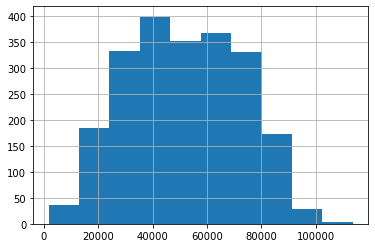

In [25]:
#visualizando o histograma 

df["Income"].hist()

<AxesSubplot:xlabel='Income'>

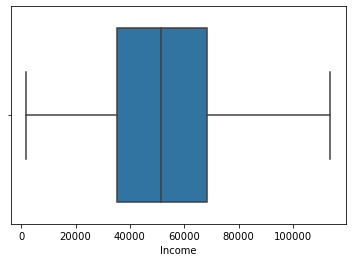

In [28]:
# visualizando o boxplot

sns.boxplot(x=df["Income"])

In [30]:
df["Income"].std()/df["Income"].mean()

0.4012441554786958

In [31]:
df["Income"].skew()

0.013164263414417078

Os salarios parecem bem distribuidos na nossa base. Algumas poucas pessoas ganham pouco e algumas poucas ganham muito, porém não há outiliers. A dispersão por outro lado é grande (muitos dados se afastam da média). Pelo skew e pelo bloxplot, podemos dizer que apesar de não completamente normal, a curva se aproxima de uma normal. 

### Nossos clientes tem níveis de educação maiores ou menores? 

<AxesSubplot:xlabel='education_level', ylabel='count'>

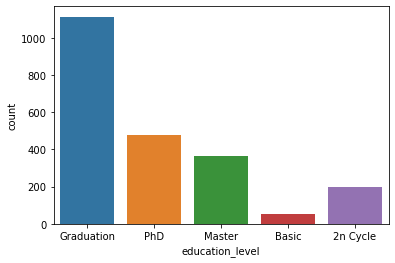

In [32]:
#gráfico de barras por educação 

sns.countplot(x=df["education_level"])

A maior parte dos nossos clientes tem graduação completa. Poucos clientes concluiram somente o nível básico. Mo geral, podemos dizer que nossos clientes tem niveis superiores de educação.

### Quantos clientes temos em cada estado civil? 

<AxesSubplot:xlabel='marital_status', ylabel='count'>

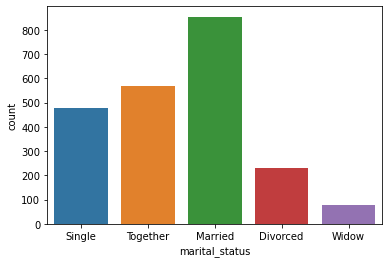

In [33]:
#gráfico de barras por educação

sns.countplot(x=df["marital_status"])

A maior parte dos nossos clientes são casados ou "Together" (moram juntos). Poucos são viúvos.

### Qual é a relação de estado civil com número de Filhos? Será que as pessoas casadas têm um número maior de filhos? Coluna: kids

<AxesSubplot:xlabel='marital_status', ylabel='kids'>

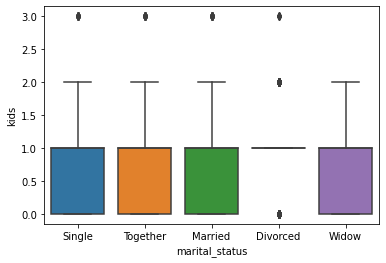

In [34]:
sns.boxplot(x='marital_status', y='kids', data=df)

In [35]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


Calcular a média de filhos por status de união

In [36]:
df.groupby("marital_status")["kids"].mean()

marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

Calcular a mediana de filhos por status de união

In [37]:
#calculando a mediana de filhos por status de união

df.groupby("marital_status")["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Apesar dos números serem muitos próximos, olhando apenas a média dizemos que single(solteiros) tem uma quantidade menor de filhos quando comparado aos outros grupos. Pórem, como podemos ver no boxplot e na mediana, é umnúmero muito próximo um do outro. Precisariamos de um teste de hipótese para comprovar diferenças.

### As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? 

<AxesSubplot:xlabel='kids', ylabel='expenses'>

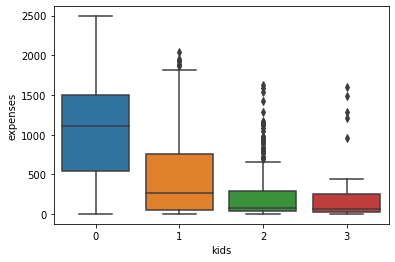

In [38]:
sns.boxplot(x='kids', y='expenses', data=df)

Calcular a média de expenses por status de união

In [39]:
#calculando a média de gastos

df.groupby("kids")["expenses"].mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

In [40]:
# calculando a mediana

df.groupby("kids")["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Podemos ver que tanto a média quanto a mediana 0 e 1 filho é maior nessa amostra de dados, porém a média de 2 filhos é menor do que de 3 filhos, enquanto a mediana de 2 filhos é maior do que de 3 filhos. Ambos os grupos 2 e 3 tem médias bem maiores do que a mediana, indicando outliers superiores (o próprio gráfico já mostra isso). Grupo 1 também tem outliers superiores, mas essa diferença é menos acentuada. Pessoas com nenhum filho tem uma distribuição um pouco mais similar a uma normal (sem outliers, e mediana levemente centrada do meio do boxplot).

### Pessoas que têm um maior salário gastam mais?

Fazer um gráfico de dispersão mostrando expenses versus income

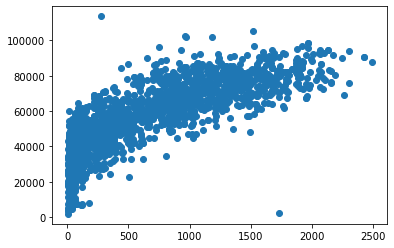

In [41]:
plt.scatter(df["expenses"], df["Income"])
plt.show()

A correlação de person é dada pela fórmula abaixo. O resultado foi 0.82.


In [42]:
df["expenses"].corr(df["Income"])

0.823066002139838

Aparentemente existe uma correlação diretamente proporcional, em que pessoas que ganham mais também gastam mais